# Preamble

In [1]:
import matplotlib.pylab as plt
from matplotlib.patches import Rectangle
import xarray as xr
import numpy as np

In [2]:
def meridional_mean(variable, filtered_new_grid, bins):
    counts_per_bin, lon_bins = np.histogram(filtered_new_grid.clon, bins=bins)
    varsum_per_bin, _ = np.histogram(filtered_new_grid.clon, weights=variable, bins=bins)
    meridional_mean = varsum_per_bin / counts_per_bin
    return meridional_mean, lon_bins

In [3]:
from matplotlib.colors import LinearSegmentedColormap

CrossEq = '#2FA026'
color2  = '#FFFFFF'  # White
ZonBelt = '#9726A0'

colors = [CrossEq, color2, ZonBelt]
positions = [0.0, 0.5, 1.0]

N=3

custom_cmap = LinearSegmentedColormap.from_list('custom_colormap', list(zip(positions, colors)), N=N)

In [4]:
SIZE = 30
plt.rcParams['axes.labelsize']  = SIZE
plt.rcParams['legend.fontsize'] = SIZE
plt.rcParams['xtick.labelsize'] = SIZE
plt.rcParams['ytick.labelsize'] = SIZE
plt.rcParams['font.size']       = SIZE

# Data

In [5]:
ocean_type = 'global_two_to_two_band'
dpp        = 'ngc2009'

In [6]:
from box_coordinates_and_paths import choose_region

degrees_lower_box_bound, degrees_upper_box_bound, degrees_left_box_bound, degrees_right_box_bound = choose_region(ocean_type)
print(ocean_type, 'with:', choose_region(ocean_type))

global_two_to_two_band with: (-2, 2, -180, 180)


In [7]:
datapath = "/work/mh0731/m300868/00_DATA/Paper_Data/"

In [8]:
ua_data = xr.open_dataset(datapath+'01_fig_ua_data_daily.nc')

In [9]:
va_data = xr.open_dataset(datapath+'01_fig_va_data_daily.nc')

In [10]:
uas = ua_data.uas
vas = va_data.vas

# Angle Computation

In [11]:
def angle_between(v1, v2):
    ''' 
    Returns the angle in degrees between vectors 'v1' and 'v2' in range [0:360] measured vom x-axis to vector. 
    To get the angle in respect to the north / y-axis we need to substract 90°. But if we want to plot the winds 
    from the direction they come from we need to add 180°, hence -90°+180°= +90° 
    '''
    return (np.rad2deg(np.arctan2(v1, v2)) - 180) % 360.0

In [12]:
WD = angle_between(uas, vas) 

In [13]:
WD_2_year = WD.sel(time=slice('2020-03-01T00:00:00.000000000','2022-02-28T00:00:00.000000000'))

# Merdional Means per Timestep and Categorisation

In [14]:
array_week = []
final_data_per_week = []

MERID_BINS = 720

for week in range(len(WD_2_year.time)):
    print("week", week)
    array_week.append(week)

    DATA_ARRAY = WD_2_year.isel(time=week)

    WD_merid_mean, lon_bins = meridional_mean(DATA_ARRAY, DATA_ARRAY, MERID_BINS)

    '''
    We move all windirection from the north quadrant to the south and
    all the east quadrant directions to the west. 
    North-south and east-west belong to the same wind pattern.
    Therefore, we span a room for winddirection from 135° to 315°
    '''

    ### Defining segments
    #####################
    
    ### Cross Equatorial
    ####################
    '''
    have value -1
    '''
        
    north_quadrant_index_one  = np.where((WD_merid_mean <= 30))
    WD_merid_mean[north_quadrant_index_one] = -1
    
    north_quadrant_index_two  = np.where((WD_merid_mean > 330))
    WD_merid_mean[north_quadrant_index_two] = -1
    
    south_quadrant_index  = np.where((WD_merid_mean <= 210) & (WD_merid_mean > 150))
    WD_merid_mean[south_quadrant_index] = -1
    
    
    ### Zonal Wind Belt
    ###################
    '''
    have value 1
    '''
    
    east_quadrant_index   = np.where((WD_merid_mean <= 120) & (WD_merid_mean > 60))
    WD_merid_mean[east_quadrant_index] = 1
    
    west_quadrant_index   = np.where((WD_merid_mean <= 300) & (WD_merid_mean > 240))
    WD_merid_mean[west_quadrant_index] = 1 
    
    
    ### transient states 
    ####################
    '''
    have value 0
    '''
    
    north_west_quadrant_index  = np.where((WD_merid_mean <= 330) & (WD_merid_mean > 300))
    WD_merid_mean[north_west_quadrant_index] = 0
    
    north_east_quadrant_index  = np.where((WD_merid_mean <= 60) & (WD_merid_mean > 30))
    WD_merid_mean[north_east_quadrant_index] = 0
    
    south_east_quadrant_index  = np.where((WD_merid_mean <= 150) & (WD_merid_mean > 120))
    WD_merid_mean[south_east_quadrant_index] = 0
    
    south_west_quadrant_index  = np.where((WD_merid_mean <= 240) & (WD_merid_mean > 210))
    WD_merid_mean[south_west_quadrant_index] = 0
    
    final_data_per_week.append(WD_merid_mean)

final_data_per_week_array = np.array(final_data_per_week)

week 0
week 1
week 2
week 3
week 4
week 5
week 6
week 7
week 8
week 9
week 10
week 11
week 12
week 13
week 14
week 15
week 16
week 17
week 18
week 19
week 20
week 21
week 22
week 23
week 24
week 25
week 26
week 27
week 28
week 29
week 30
week 31
week 32
week 33
week 34
week 35
week 36
week 37
week 38
week 39
week 40
week 41
week 42
week 43
week 44
week 45
week 46
week 47
week 48
week 49
week 50
week 51
week 52
week 53
week 54
week 55
week 56
week 57
week 58
week 59
week 60
week 61
week 62
week 63
week 64
week 65
week 66
week 67
week 68
week 69
week 70
week 71
week 72
week 73
week 74
week 75
week 76
week 77
week 78
week 79
week 80
week 81
week 82
week 83
week 84
week 85
week 86
week 87
week 88
week 89
week 90
week 91
week 92
week 93
week 94
week 95
week 96
week 97
week 98
week 99
week 100
week 101
week 102
week 103
week 104
week 105
week 106
week 107
week 108
week 109
week 110
week 111
week 112
week 113
week 114
week 115
week 116
week 117
week 118
week 119
week 120
week 121
week 122
wee

# Statitics

In [16]:
total_values = final_data_per_week_array.size

counts = {value: (final_data_per_week_array == value).sum().item() for value in [-1, 0, 1]}

percentages = {value: (count / total_values) * 100 for value, count in counts.items()}

for value, percentage in percentages.items():
    print(f"Value {value}: {percentage:.2f}%")

Value -1: 23.42%
Value 0: 25.75%
Value 1: 50.83%


# Plotting

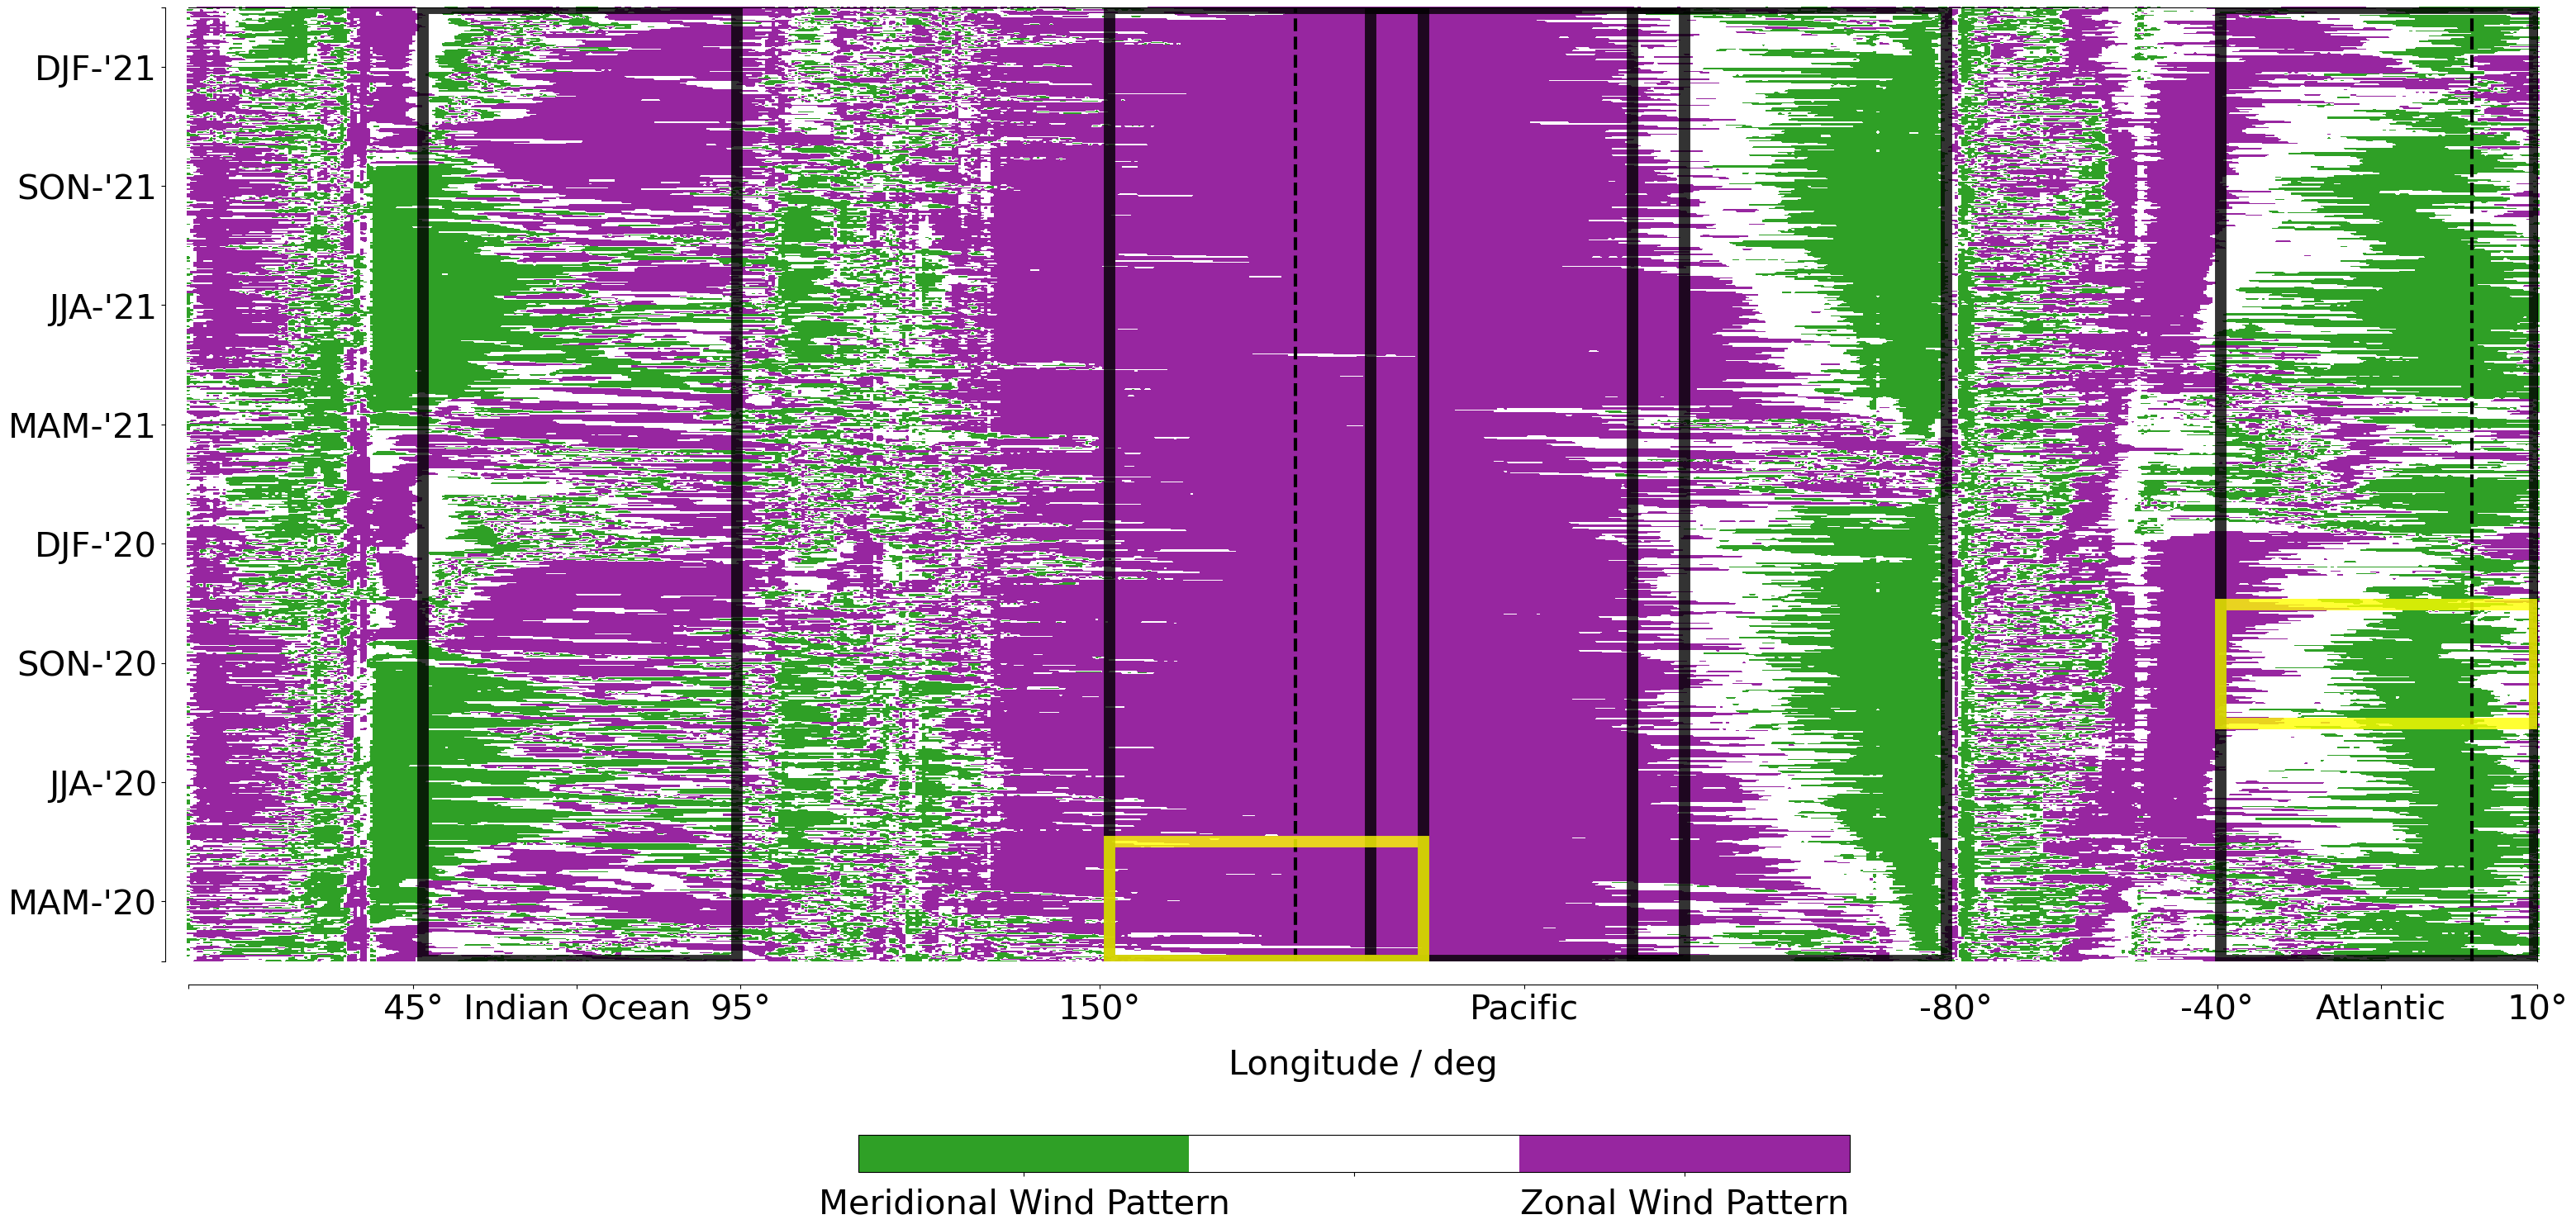

In [16]:
fig = plt.figure(figsize=(40,15), facecolor='none', edgecolor='k')

VMIN = -1.5
VMAX = 1.5

aspect_ratio = 0.4

ax = plt.subplot()

DATA_ARRAY = np.roll(final_data_per_week_array, 340, axis=1)
im = ax.imshow(DATA_ARRAY, cmap=custom_cmap, clip_on=False, origin='lower', vmin=VMIN, vmax=VMAX, aspect=aspect_ratio)

ax.set_xlim(0,len(DATA_ARRAY[0,:])-1)
ax.set_xticks([0, 69, 119, 169, 279, MERID_BINS-311, MERID_BINS-2*90+1, MERID_BINS-2*50+1, MERID_BINS-2*25+1, MERID_BINS-1])
ax.set_xticklabels(['','45°','Indian Ocean','95°','150°','Pacific','-80°','-40°','Atlantic','10°'])

ax.set_yticks([-0.5, (0.5/8)*len(DATA_ARRAY), (1.5/8)*len(DATA_ARRAY), (2.5/8)*len(DATA_ARRAY), (3.5/8)*len(DATA_ARRAY), (4.5/8)*len(DATA_ARRAY), (5.5/8)*len(DATA_ARRAY), (6.5/8)*len(DATA_ARRAY), (7.5/8)*len(DATA_ARRAY), len(DATA_ARRAY)-0.5])
ax.set_yticklabels(['', "MAM-'20", "JJA-'20", "SON-'20", "DJF-'20", "MAM-'21", "JJA-'21", "SON-'21", "DJF-'21",''])
ax.set_ylim(-0.5,len(DATA_ARRAY)-0.5)
ax.set_xlabel('Longitude / deg', labelpad=20)
ax.spines[['left', 'bottom']].set_position(('outward',20))

cb_ax = fig.add_axes([0.36, -0.06, 0.3, 0.03])
cbar = fig.colorbar(im, orientation='horizontal', ticks=[VMIN+0.5, 0, VMAX-0.5], cax=cb_ax)
cbar.ax.set_xticklabels([f'Meridional Wind Pattern', f'', f'Zonal Wind Pattern'])
cbar.ax.tick_params(axis='both', which='major', pad=10)

plt.axvline(MERID_BINS-381, linestyle='dashed', linewidth=3, color = "black", alpha=1, zorder=2)
plt.axvline(MERID_BINS-21, linestyle='dashed', linewidth=3, color = "black", alpha=1, zorder=2)

ax.add_patch(Rectangle((72,0),96,len(DATA_ARRAY)-1, 
                        edgecolor='black', 
                        facecolor='None', 
                        lw=10,
                        alpha=0.8,
                        zorder=10))

ax.add_patch(Rectangle((282,0),96,len(DATA_ARRAY)-1, 
                        edgecolor='black', 
                        facecolor='None', 
                        lw=10,
                        alpha=0.8,
                        zorder=10))


### WPCF MAM
ax.add_patch(Rectangle((282,0),96,int(((0.5/8)*len(DATA_ARRAY)+(1.5/8)*len(DATA_ARRAY))/2), 
                        edgecolor='yellow', 
                        facecolor='None', 
                        lw=10,
                        alpha=0.8,
                        zorder=20))

ax.add_patch(Rectangle((362,0),96,len(DATA_ARRAY)-1, 
                        edgecolor='black', 
                        facecolor='None', 
                        lw=10,
                        alpha=0.8,
                        zorder=10))

ax.add_patch(Rectangle((442,0),96,len(DATA_ARRAY)-1, 
                        edgecolor='black', 
                        facecolor='None', 
                        lw=10,
                        alpha=0.8,
                        zorder=10))

ax.add_patch(Rectangle((622,0),96,len(DATA_ARRAY)-1, 
                        edgecolor='black', 
                        facecolor='None', 
                        lw=10,
                        alpha=0.8,
                        zorder=10))

ax.add_patch(Rectangle((622,int(((1.5/8)*len(DATA_ARRAY)+(2.5/8)*len(DATA_ARRAY))/2)),96,int(((0.5/8)*len(DATA_ARRAY)+(1.5/8)*len(DATA_ARRAY))/2), 
                        edgecolor='yellow', 
                        facecolor='None', 
                        lw=10,
                        alpha=0.8,
                        zorder=10))

ax.axvline(MERID_BINS-381, linestyle='dashed', linewidth=3, color = "black", alpha=1, zorder=10)
ax.axvline(MERID_BINS-21, linestyle='dashed', linewidth=3, color = "black", alpha=1)


filename = f'fig_01.png'
filepath = datapath+'figs/'
plt.savefig(filepath + filename, facecolor='none', bbox_inches='tight', dpi=800)

plt.show()

In [17]:
datapath

'/work/mh0731/m300868/00_DATA/Paper_Data/'

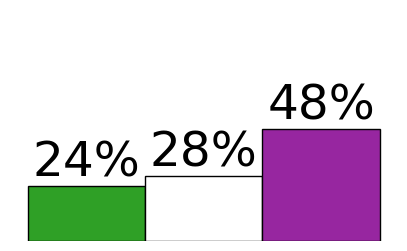

In [18]:
fig = plt.figure(figsize=(5,3), facecolor='none', edgecolor='k')

ax = plt.subplot()

LEFT  = 45
RIGHT = 95

HISTO_DATA = DATA_ARRAY[:,2*LEFT:2*RIGHT].ravel()

bin_edges = [-1.5, -0.5, 0.5, 1.5] 

hist, bins, patches = ax.hist(HISTO_DATA, bins=bin_edges, density=True, edgecolor='black')

patches[0].set_facecolor('#2FA026')
patches[1].set_facecolor('white')
patches[2].set_facecolor('#9726A0')

ax.set_ylim(0,1)
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_yticks([])
ax.set_yticklabels([])
ax.spines[['left', 'right', 'top', 'bottom']].set_visible(False)

counts, _ = np.histogram(HISTO_DATA, bins=bin_edges)

percentages = (counts / np.sum(counts)) * 100
for i, percentage in enumerate(percentages):
    ax.text(bins[i] + (bins[i + 1] - bins[i]) / 2, hist[i], f'{round(percentage)}%', ha='center', va='bottom', fontsize=35)

filename = f'fig_01_histo_indian_ocean.png'
filepath = datapath+'figs/'
plt.savefig(filepath + filename, facecolor='none', bbox_inches='tight', dpi=800)

plt.show()

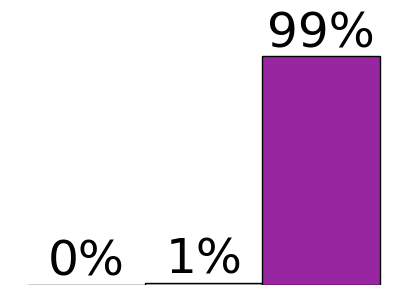

In [19]:
fig = plt.figure(figsize=(5,3), facecolor='none', edgecolor='k')

ax = plt.subplot()

LEFT  = 150
RIGHT = 200

HISTO_DATA = DATA_ARRAY[:,2*LEFT:2*RIGHT].ravel()

bin_edges = [-1.5, -0.5, 0.5, 1.5] 

hist, bins, patches = ax.hist(HISTO_DATA, bins=bin_edges, density=True, edgecolor='black')

patches[0].set_facecolor('#2FA026')
patches[1].set_facecolor('white')
patches[2].set_facecolor('#9726A0')

ax.set_ylim(0,1)
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_yticks([])
ax.set_yticklabels([])
ax.spines[['left', 'right', 'top', 'bottom']].set_visible(False)

counts, _ = np.histogram(HISTO_DATA, bins=bin_edges)

percentages = (counts / np.sum(counts)) * 100
for i, percentage in enumerate(percentages):
    ax.text(bins[i] + (bins[i + 1] - bins[i]) / 2, hist[i], f'{round(percentage)}%', ha='center', va='bottom', fontsize=35)

filename = f'fig_01_histo_western_pacific.png'
filepath = datapath+'figs/'
plt.savefig(filepath + filename, facecolor='none', bbox_inches='tight', dpi=800)

plt.show()

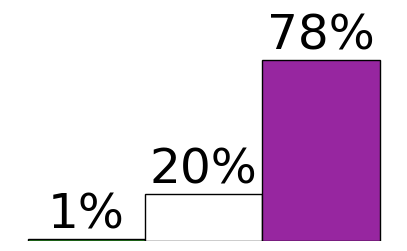

In [20]:
fig = plt.figure(figsize=(5,3), facecolor='none', edgecolor='k')

ax = plt.subplot()

LEFT  = 190
RIGHT = 240

HISTO_DATA = DATA_ARRAY[:,2*LEFT:2*RIGHT].ravel()

bin_edges = [-1.5, -0.5, 0.5, 1.5] 

hist, bins, patches = ax.hist(HISTO_DATA, bins=bin_edges, density=True, edgecolor='black')

patches[0].set_facecolor('#2FA026')
patches[1].set_facecolor('white')
patches[2].set_facecolor('#9726A0')

ax.set_ylim(0,1)
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_yticks([])
ax.set_yticklabels([])
ax.spines[['left', 'right', 'top', 'bottom']].set_visible(False)

counts, _ = np.histogram(HISTO_DATA, bins=bin_edges)

percentages = (counts / np.sum(counts)) * 100
for i, percentage in enumerate(percentages):
    ax.text(bins[i] + (bins[i + 1] - bins[i]) / 2, hist[i], f'{round(percentage)}%', ha='center', va='bottom', fontsize=35)

filename = f'fig_01_histo_central_pacific.png'
filepath = datapath+'figs/'
plt.savefig(filepath + filename, facecolor='none', bbox_inches='tight', dpi=800)

plt.show()

42.3
39.35205479452055
18.34794520547945


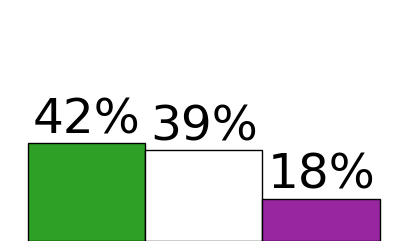

In [21]:
fig = plt.figure(figsize=(5,3), facecolor='none', edgecolor='k')

ax = plt.subplot()

LEFT  = 230
RIGHT = 280

HISTO_DATA = DATA_ARRAY[:,2*LEFT:2*RIGHT].ravel()

bin_edges = [-1.5, -0.5, 0.5, 1.5] 

hist, bins, patches = ax.hist(HISTO_DATA, bins=bin_edges, density=True, edgecolor='black')

patches[0].set_facecolor('#2FA026')
patches[1].set_facecolor('white')
patches[2].set_facecolor('#9726A0')

ax.set_ylim(0,1)
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_yticks([])
ax.set_yticklabels([])
ax.spines[['left', 'right', 'top', 'bottom']].set_visible(False)

counts, _ = np.histogram(HISTO_DATA, bins=bin_edges)

percentages = (counts / np.sum(counts)) * 100
for i, percentage in enumerate(percentages):
    print(percentage)
    ax.text(bins[i] + (bins[i + 1] - bins[i]) / 2, hist[i], f'{round(percentage)}%', ha='center', va='bottom', fontsize=35)

filename = f'fig_01_histo_eastern_pacific.png'
filepath = datapath+'figs/'
plt.savefig(filepath + filename, facecolor='none', bbox_inches='tight', dpi=800)

plt.show()

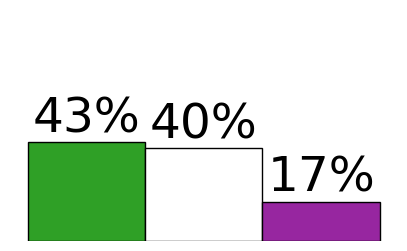

In [23]:
fig = plt.figure(figsize=(5,3), facecolor='none', edgecolor='k')

ax = plt.subplot()

LEFT  = 310
RIGHT = 360

HISTO_DATA = DATA_ARRAY[:,2*LEFT:2*RIGHT].ravel()

bin_edges = [-1.5, -0.5, 0.5, 1.5] 

hist, bins, patches = ax.hist(HISTO_DATA, bins=bin_edges, density=True, edgecolor='black')

patches[0].set_facecolor('#2FA026')
patches[1].set_facecolor('white')
patches[2].set_facecolor('#9726A0')

ax.set_ylim(0,1)
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_yticks([])
ax.set_yticklabels([])
ax.spines[['left', 'right', 'top', 'bottom']].set_visible(False)

counts, _ = np.histogram(HISTO_DATA, bins=bin_edges)

percentages = (counts / np.sum(counts)) * 100
for i, percentage in enumerate(percentages):
    ax.text(bins[i] + (bins[i + 1] - bins[i]) / 2, hist[i], f'{round(percentage)}%', ha='center', va='bottom', fontsize=35)

filename = f'fig_01_histo_atlantic.png'
filepath = datapath+'figs/'
plt.savefig(filepath + filename, facecolor='none', bbox_inches='tight', dpi=800)

plt.show()